Confusion Matrix:
[[64  4]
 [ 3 29]]
Accuracy: 0.93


/tmp/ipykernel_17/3643375513.py:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


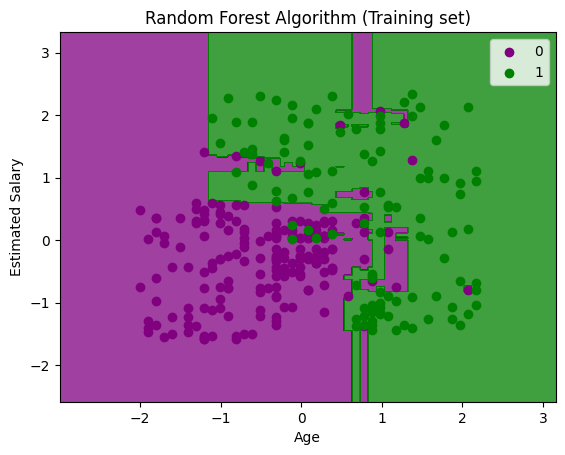

/tmp/ipykernel_17/3643375513.py:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


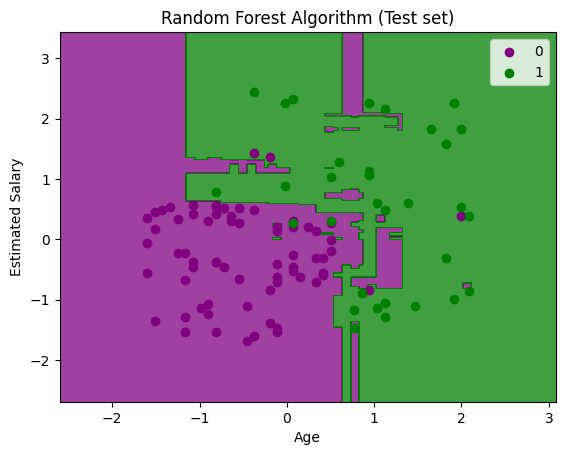

In [1]:
#importing the libaries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#importing the dataset
data_set=pd.read_csv('/kaggle/input/social-network-adslogistic-regressionbinomial/Social Network Ads.csv')\

#assiging the indpendant and dependant variales
x=data_set.iloc[:,[2,3]].values
y=data_set.iloc[:,4].values

#splitting the dataset into training and test datset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)

#fitting the random forest classifier into the datset
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)

#predicing the test set result
y_pred=classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.2f}")


# Visualizing the training set results
from matplotlib.colors import ListedColormap

def visualize_results(X_set, y_set, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
    )
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('purple', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('purple', 'green'))(i), label=j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Visualizing Training Set
visualize_results(x_train, y_train, 'Random Forest Algorithm (Training set)')

# Visualizing Test Set
visualize_results(x_test, y_test, 'Random Forest Algorithm (Test set)')


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    